<a href="https://colab.research.google.com/github/Emmanuel-Rono/Machine-Learning-Practices/blob/main/3_1_Shallow_Networks_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.1 -- Shallow neural networks I**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs.  It works through an example similar to figure 3.3 and experiments with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  activation = np.clip(preactivation, a_min=0, a_max=None)

  return activation

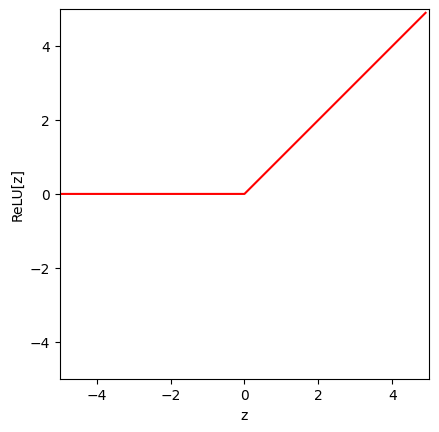

In [3]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

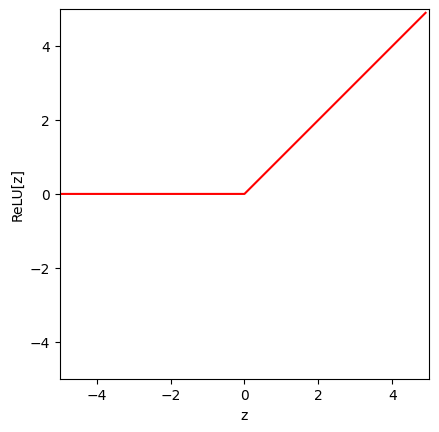

Output y: [3.5]
Pre-activation values: pre_1 = [2.], pre_2 = [-2.], pre_3 = [1.]
Activation values: act_1 = [2.], act_2 = [0.], act_3 = [1.]
Weighted activations: w_act_1 = [2.], w_act_2 = [0.], w_act_3 = [1.]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    # ReLU activation function: returns max(0, z)
    return np.clip(preactivation, 0, None)

# Make an array of inputs for plotting the ReLU function
z = np.arange(-5, 5, 0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z, RelU_z, 'r-')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_xlabel('z')
ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

# Define a shallow neural network with one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    # Compute the preactivations for each hidden unit
    pre_1 = theta_10 * x + theta_11  # Pre-activation for hidden unit 1
    pre_2 = theta_20 * x + theta_21  # Pre-activation for hidden unit 2
    pre_3 = theta_30 * x + theta_31  # Pre-activation for hidden unit 3

    # Apply the ReLU function to the preactivations to get the activations
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activations using phi_1, phi_2, phi_3
    w_act_1 = phi_1 * act_1  # Weighted activation for hidden unit 1
    w_act_2 = phi_2 * act_2  # Weighted activation for hidden unit 2
    w_act_3 = phi_3 * act_3  # Weighted activation for hidden unit 3

    # Combine the weighted activations and add phi_0 to get the output
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return all the intermediate steps and final output
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

# input value
x_input = np.array([1.0])

# parameters for the network
phi_0 = 0.5
phi_1 = 1.0
phi_2 = 1.0
phi_3 = 1.0
theta_10 = 1.5
theta_11 = 0.5
theta_20 = -1.5
theta_21 = -0.5
theta_30 = 2.0
theta_31 = -1.0

# Call the neural network function
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_1_1_3(
    x_input, ReLU, phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31
)

# Print the outputs for inspection
print(f"Output y: {y}")
print(f"Pre-activation values: pre_1 = {pre_1}, pre_2 = {pre_2}, pre_3 = {pre_3}")
print(f"Activation values: act_1 = {act_1}, act_2 = {act_2}, act_3 = {act_3}")
print(f"Weighted activations: w_act_1 = {w_act_1}, w_act_2 = {w_act_2}, w_act_3 = {w_act_3}")


In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

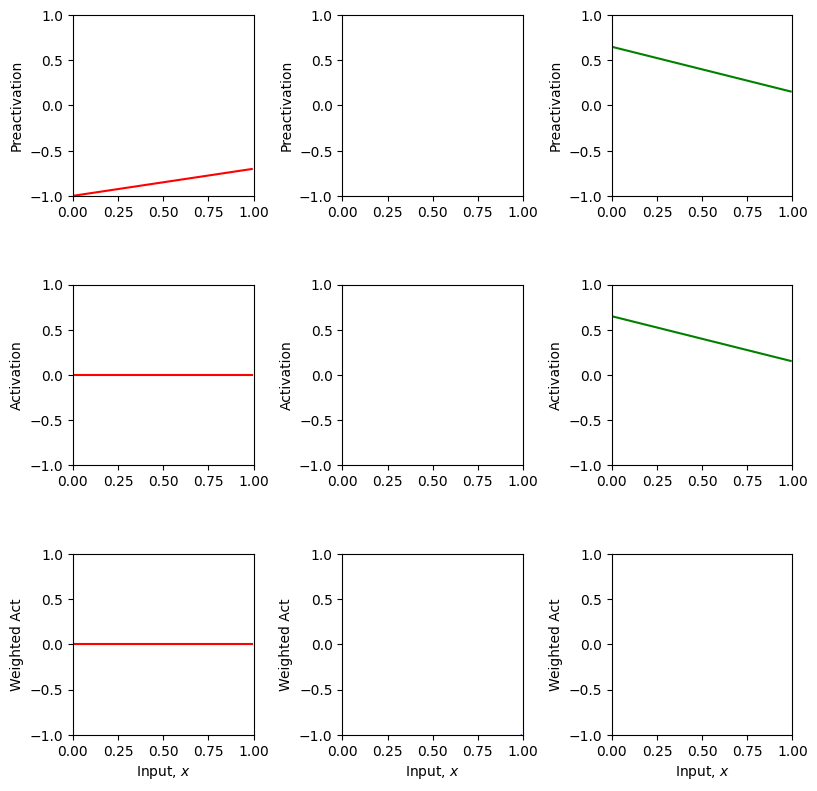

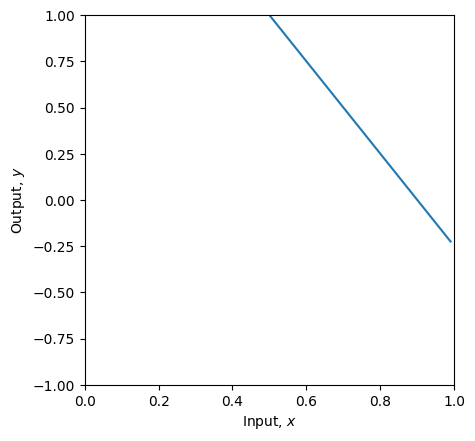

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

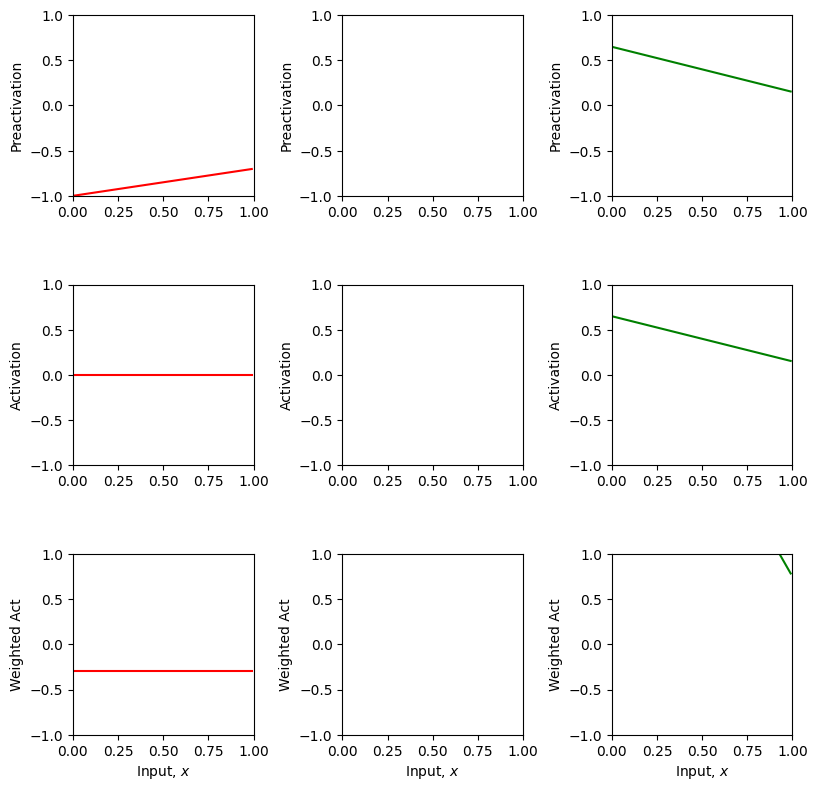

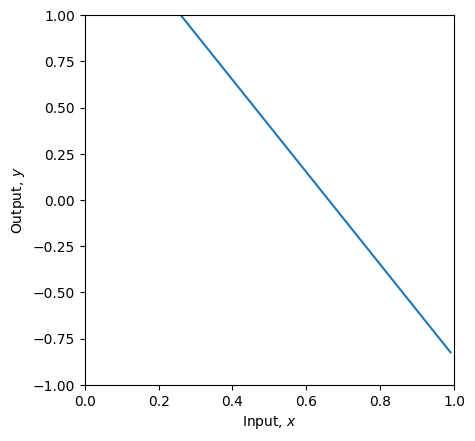

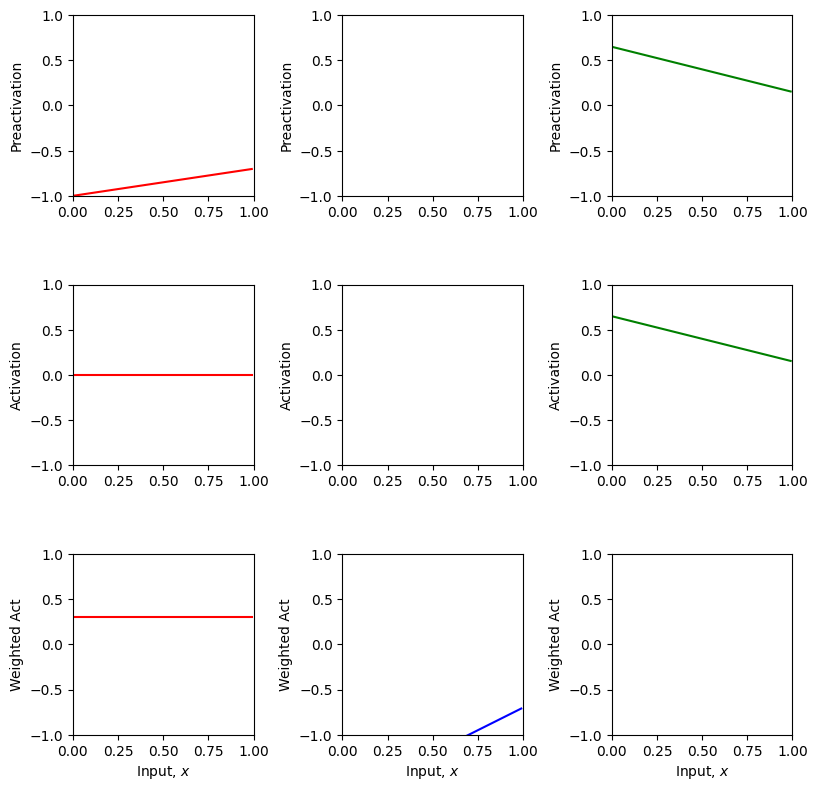

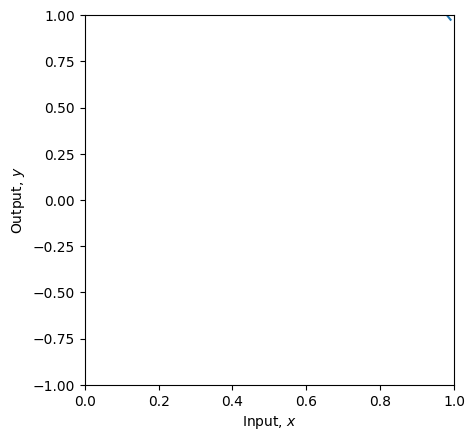

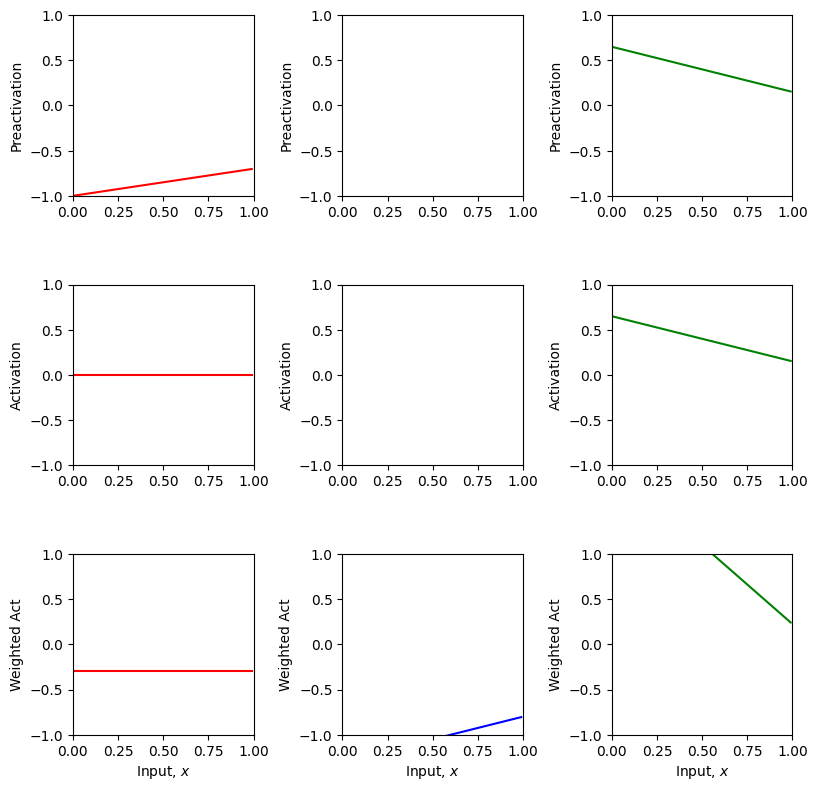

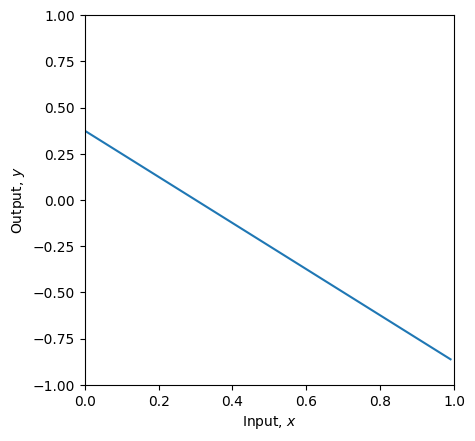

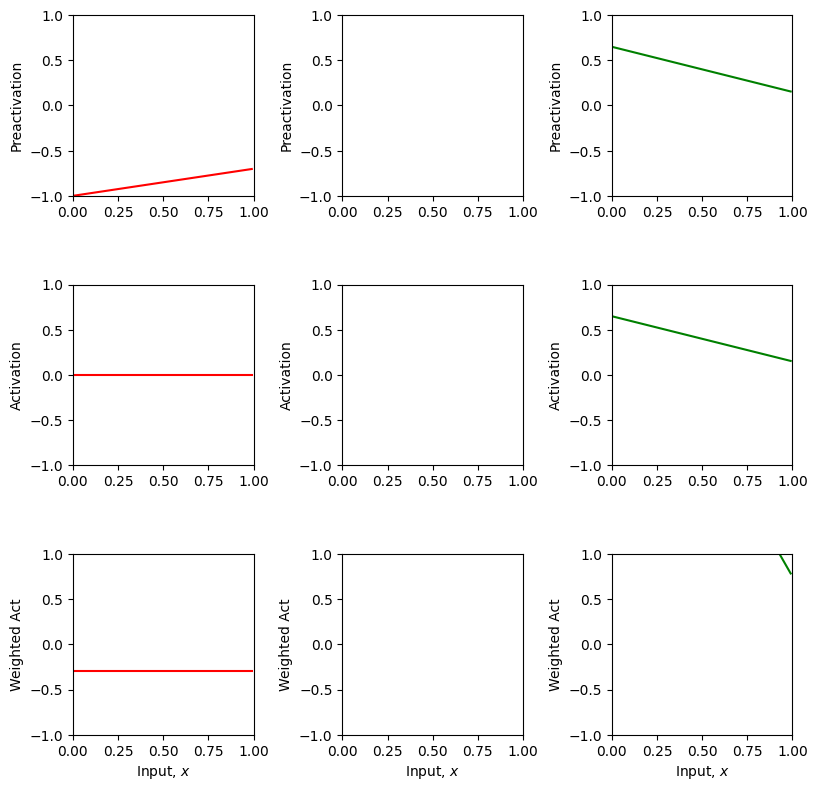

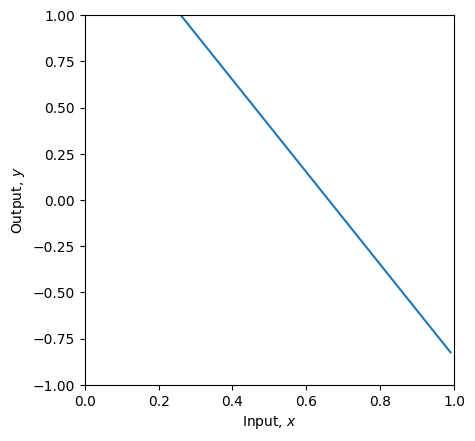

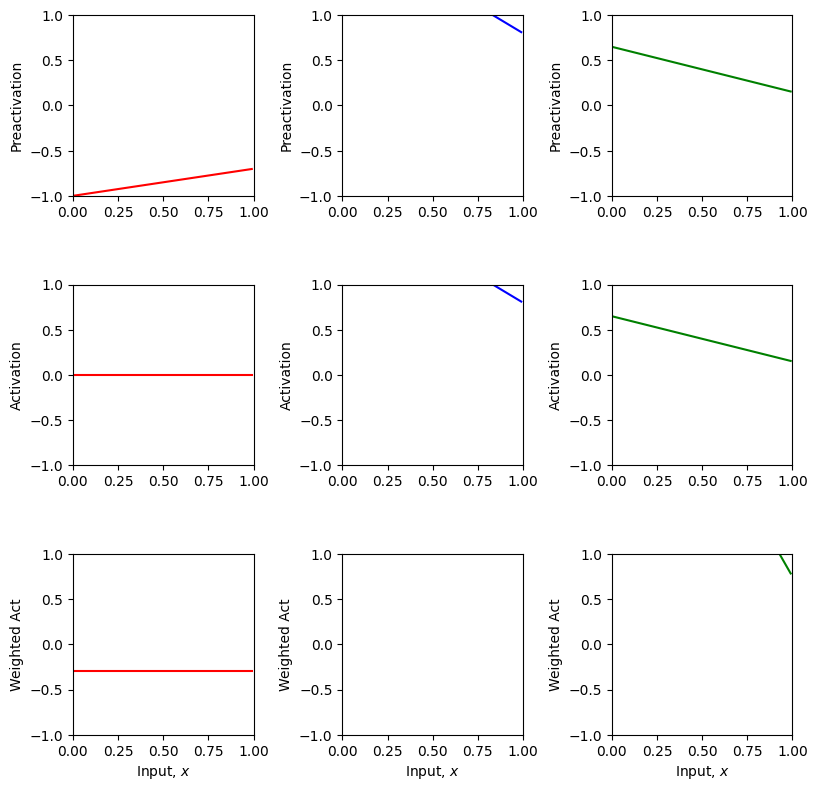

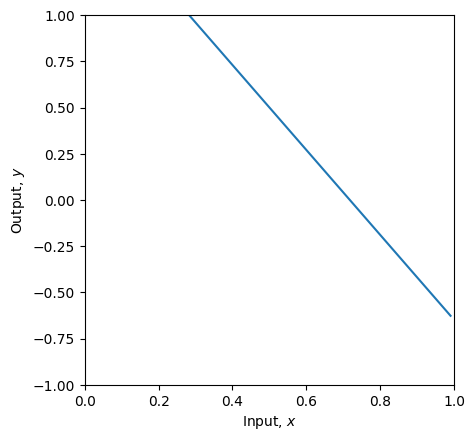

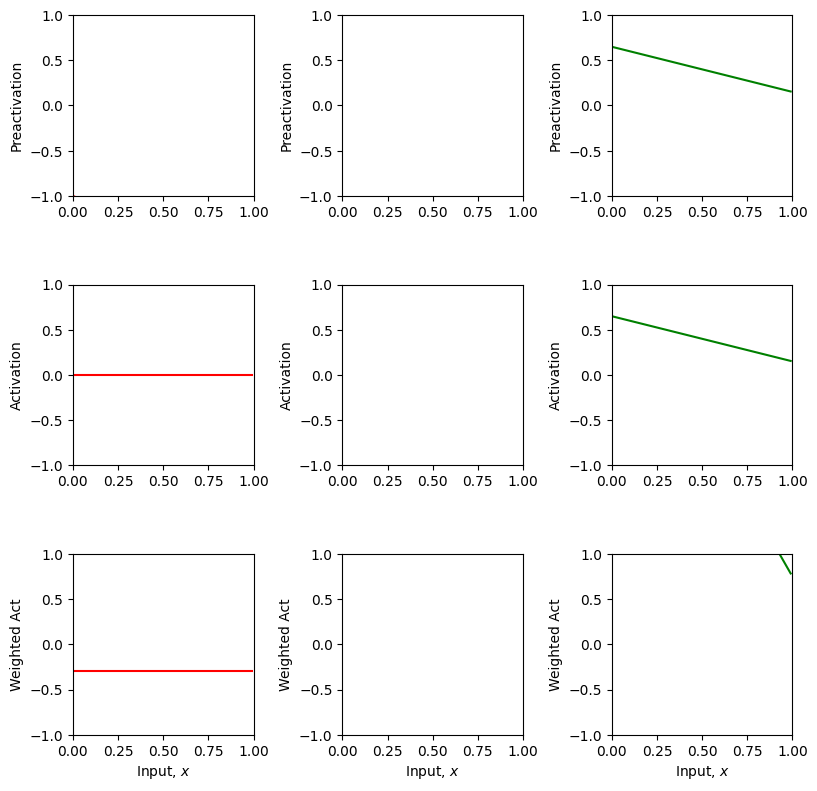

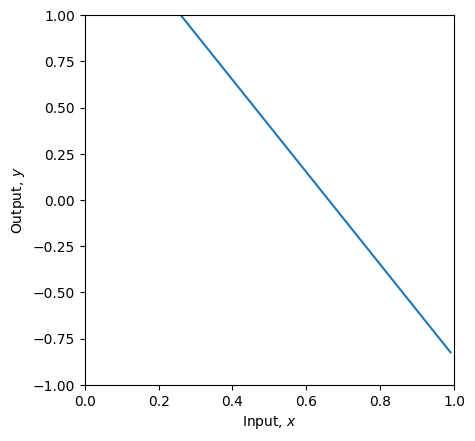

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function (ReLU)
def ReLU(x):
    return np.maximum(0, x)

# Define the shallow neural network
def shallow_1_1_3(x, act, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    pre_1 = theta_10 * x + theta_11
    pre_2 = theta_20 * x + theta_21
    pre_3 = theta_30 * x + theta_31

    act_1 = act(pre_1)
    act_2 = act(pre_2)
    act_3 = act(pre_3)

    w_act_1 = phi_0 + phi_1 * act_1
    w_act_2 = phi_0 + phi_2 * act_2
    w_act_3 = phi_0 + phi_3 * act_3

    y = w_act_1 + w_act_2 + w_act_3  # Output is the sum of weighted activations
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

# Plotting function
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):
    # Plot intermediate plots if flag set
    if plot_all:
        fig, ax = plt.subplots(3,3)
        fig.set_size_inches(8.5, 8.5)
        fig.tight_layout(pad=3.0)
        ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
        ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
        ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
        ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
        ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
        ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
        ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
        ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
        ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

        for plot_y in range(3):
            for plot_x in range(3):
                ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
                ax[plot_y,plot_x].set_aspect(0.5)
            ax[2,plot_y].set_xlabel('Input, $x$')
        plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
    ax.set_xlim([0,1]); ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    if x_data is not None:
        ax.plot(x_data, y_data, 'mo')
        for i in range(len(x_data)):
            ax.plot(x_data[i], y_data[i])
    plt.show()

# Original parameters
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network with original parameters
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the result
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Modify parameters as per the tasks

# Task 1: Change phi_0 (let's try changing phi_0 to 0.3)
phi_0_new = 0.3
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0_new, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Task 2: Multiply phi_1, phi_2, phi_3 by 0.5
phi_1_new = phi_1 * 0.5
phi_2_new = phi_2 * 0.5
phi_3_new = phi_3 * 0.5
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1_new, phi_2_new, phi_3_new, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Task 3: Multiply phi_1 by -1
phi_1_new = phi_1 * -1
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1_new, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Task 4: Set theta_20 to -1.2
theta_20_new = -1.2
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20_new, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Task 5: Reduce to two "joints" (changing parameters accordingly)
theta_10_new = theta_11  # Making first segment flat
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10_new, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)


# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [9]:
# Least squares loss function
def least_squares_loss(y_train, y_predict):
    # Compute the sum of squared differences between the real values and predicted values
    loss = np.sum((y_train - y_predict) ** 2)
    return loss


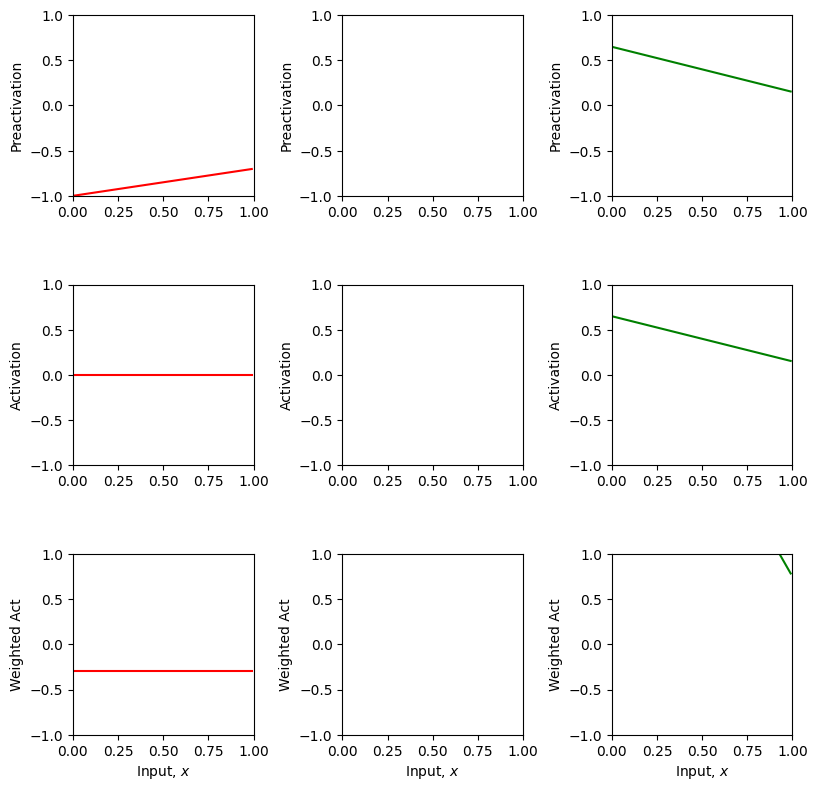

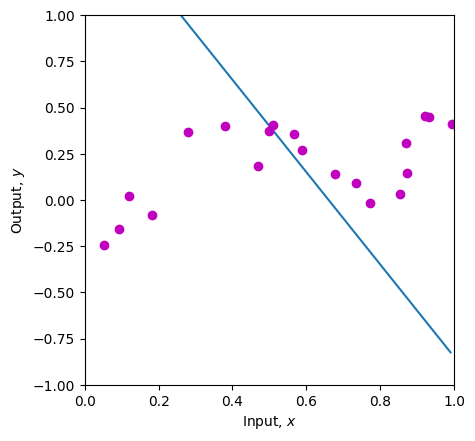

Your Loss = 15.145, True value = 9.385


In [10]:
# Now let's define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0, 1, 0.01)

# Training data (for evaluation)
x_train = np.array([0.09291784, 0.46809093, 0.93089486, 0.67612654, 0.73441752, 0.86847339,
                   0.49873225, 0.51083168, 0.18343972, 0.99380898, 0.27840809, 0.38028817,
                   0.12055708, 0.56715537, 0.92005746, 0.77072270, 0.85278176, 0.05315950,
                   0.87168699, 0.58858043])

y_train = np.array([-0.15934537, 0.18195445, 0.45127015, 0.13921448, 0.09366691, 0.30567674,
                    0.37229117, 0.40716968, -0.08131792, 0.41187806, 0.36943738, 0.3994327,
                    0.01906257, 0.35820410, 0.45256496, -0.0183121, 0.02957665, -0.24354444,
                    0.14803884, 0.26824970])

# Run the neural network for the input values (x)
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the neural network output
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data=x_train, y_data=y_train)

# Run the neural network on the training data (x_train)
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss
loss = least_squares_loss(y_train, y_predict)

# Print the loss value
print(f'Your Loss = {loss:.3f}, True value = 9.385')

# TODO: Manipulate the parameters (by hand!) to make the function fit the data better and try to reduce the loss to as small a number as possible.
# The best that I could do was 0.181
# Tip: Start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!
